In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

train_dir = 'drive/MyDrive/emotion detection/data/train'
val_dir = 'drive/MyDrive/emotion detection/data/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=2,
    vertical_flip=2
)

In [ ]:
training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48),
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )

Found 28735 images belonging to 7 classes.


In [ ]:
testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48),
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )


Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = "adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

<ipython-input-8-427e66dfd6c7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)


Epoch 1/5
113/113 [==============================] - 8350s 74s/step - loss: 6.7990 - accuracy: 0.2110 - val_loss: 4.1789 - val_accuracy: 0.2471
Epoch 2/5
113/113 [==============================] - 56s 492ms/step - loss: 2.8607 - accuracy: 0.2973 - val_loss: 2.9630 - val_accuracy: 0.2471
Epoch 3/5
113/113 [==============================] - 55s 486ms/step - loss: 2.3038 - accuracy: 0.3910 - val_loss: 2.9457 - val_accuracy: 0.2873
Epoch 4/5
113/113 [==============================] - 54s 481ms/step - loss: 2.1926 - accuracy: 0.4517 - val_loss: 2.7298 - val_accuracy: 0.3338
Epoch 5/5
113/113 [==============================] - 54s 481ms/step - loss: 2.0888 - accuracy: 0.4802 - val_loss: 2.2463 - val_accuracy: 0.4402


In [ ]:
hist = hist.history

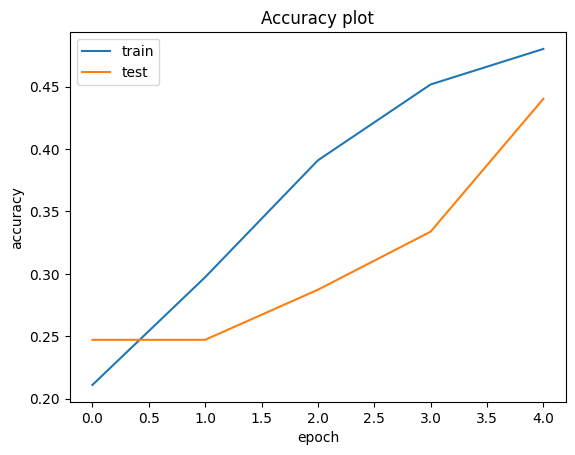

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

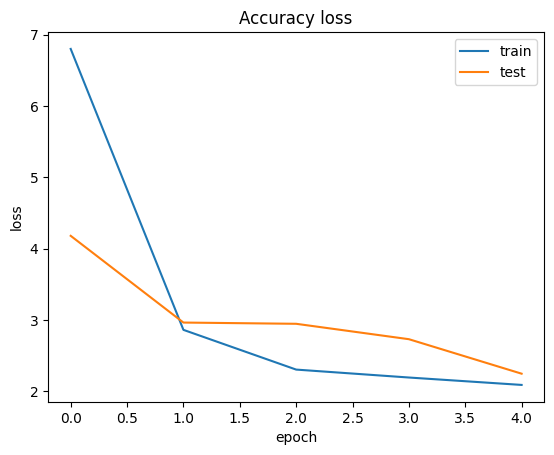

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
model.save("/content/drive/MyDrive/emotion detection/CNNv2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install cvlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 86.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=6949c507c42aeb58b292521d8aad4907ce6098219528e2be469d6a3551a66dd5
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=67aff31473c72da2e5656f9a8a74ce1a4431d9271da04515d02070abd456fb08
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar
